<a href="https://colab.research.google.com/github/ImanolCham/CursoAIUPM/blob/main/mini_eda_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-EDA guiada con pandas
**Sesión 2 · Trabajando con Datos**

Este cuaderno sigue el flujo típico de trabajo con datos:
1) **Inspección** (qué variables tengo, tamaños, nulos)  
2) **EDA** (resúmenes numéricos básicos)  
3) **Relaciones** (comparar grupos con `groupby`)  
4) **Limpieza** (faltantes + outliers)  
5) **Conversión a numérico** (encoding)  
6) **Normalización / estandarización**

Completa las celdas `# TODO`. Algunas se validan con `test_eda.py`

## Setup

In [18]:
# @title Setup
import os, sys

REPO_URL = "https://github.com/Javier-upm/Titulo-propio-IA"
REPO_DIR = "/content/Titulo-propio-IA"
SESSION_DIR = "sesion_2"

# 1) Clonar repo si no existe
if not os.path.exists(REPO_DIR):
    !git clone --depth 1 "{REPO_URL}" "{REPO_DIR}"
else:
    print("Repo ya presente:", REPO_DIR)

# 2) Añadir la carpeta de la sesión al path (para importar test_eda.py)
session_path = os.path.join(REPO_DIR, SESSION_DIR)
if session_path not in sys.path:
    sys.path.insert(0, session_path)

print("Ruta de sesión:", session_path)
print("Contenido:", os.listdir(session_path))

# 3) Importar tests
import test_eda
print("✅ test_eda.py importado correctamente")

# 4) Ruta al dataset
DATA_PATH = os.path.join(session_path, "students.csv")
print("DATA_PATH:", DATA_PATH)


Repo ya presente: /content/Titulo-propio-IA
Ruta de sesión: /content/Titulo-propio-IA\sesion_2
Contenido: ['Mini_EDA_students.ipynb', 'Readme.md', 'students.csv', 'test_eda.py', '__pycache__']
✅ test_eda.py importado correctamente
DATA_PATH: /content/Titulo-propio-IA\sesion_2\students.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(DATA_PATH)
df.head()

,genero,procedencia,nivel_educativo_padres,come_en_centro,curso_preparacion,nota_matematicas,nota_lectura,nota_escritura
0,mujer,publico,universitarios,no,no,6.96,5.64,6.08
1,hombre,publico,secundarios,si,si,7.98,5.19,5.98
2,mujer,publico,universitarios,si,no,8.15,7.45,8.20
3,mujer,publico,bachillerato,no,si,7.22,7.21,6.70
4,hombre,concertado,primarios,si,no,5.94,5.32,6.65


## 1️⃣ Inspección inicial

Antes de analizar nada, responde:

1. **Tamaño del dataset**: Genera una tupla con la información del ( número de filas, número de columnas).  
2. **Lista de columnas**: Crea una lista con los nombres de las variables (columnas).  
3. **Diccionario de nulos**: Las claves serán los nombres de las columnas y su valor el nº de valores faltantes por columna.

### Pistas (pandas)
- `df.shape`
- `list(df.columns)`
- `df.isna().sum().to_dict()`

In [20]:
# TODO
shape =  df.shape             # tuple: (filas, columnas)
columnas = list(df.columns)              # list[str]
nulos = df.isna().sum().to_dict()             # dict: {columna: n_nulos} convierte un objeto estructurado en un diccionario nativo

shape, columnas, nulos

((1000, 8),
 ['genero',
  'procedencia',
  'nivel_educativo_padres',
  'come_en_centro',
  'curso_preparacion',
  'nota_matematicas',
  'nota_lectura',
  'nota_escritura'],
 {'genero': 0,
  'procedencia': 50,
  'nivel_educativo_padres': 0,
  'come_en_centro': 50,
  'curso_preparacion': 0,
  'nota_matematicas': 50,
  'nota_lectura': 0,
  'nota_escritura': 0})

In [21]:
# @title Tests Bloque 1 (no modificar)
from test_eda import check_1
check_1(df, shape, columnas, nulos)
print("✅ Bloque 1 correcto")

✅ Bloque 1 correcto


## 2️⃣ EDA básico con notas

Ahora trabajaremos con las columnas de notas:
- `nota_matematicas`, `nota_lectura`, `nota_escritura`

Tareas:
1. Calcula la **media de cada asignatura** y guárdala en una **Serie** (`media_asignaturas`).
   - Índices: nombres de columnas
   - Valores: medias
2. Calcula cuántos alumnos tienen **más de 5 en las 3 notas** (`num_aprobados_todo`).
3. Crea una nueva columna **`Nota media`** con la media de las 3 notas por alumno.

### Pistas (pandas)
- `df[cols].mean()`
- `(df[cols] > 5).all(axis=1).sum()`
- `df[cols].mean(axis=1)`

In [22]:
# TODO
cols_notas = ["nota_matematicas", "nota_lectura", "nota_escritura"]

media_asignaturas = df[cols_notas].mean()     # pd.Series
num_aprobados_todo = (df[cols_notas]>5).all(axis=1).sum() # el .all(axis=1) significa que TODOS los valores de una fila tienen que ser True

df["Nota media"] = df[cols_notas].mean(axis=1)      # crea la columna

media_asignaturas, num_aprobados_todo, df[cols_notas + ["Nota media"]].head()

(nota_matematicas    8.870726
 nota_lectura        8.222410
 nota_escritura      8.279000
 dtype: float64,
 786,
    nota_matematicas  nota_lectura  nota_escritura  Nota media
 0              6.96          5.64            6.08    6.226667
 1              7.98          5.19            5.98    6.383333
 2              8.15          7.45            8.20    7.933333
 3              7.22          7.21            6.70    7.043333
 4              5.94          5.32            6.65    5.970000)

In [23]:
# @title Tests Bloque 2 (no modificar)
from test_eda import check_2
check_2(df, cols_notas, media_asignaturas, num_aprobados_todo)
print("✅ Bloque 2 correcto")

✅ Bloque 2 correcto


## 3️⃣ Relaciones entre variables con `groupby`

Una parte clave del EDA es buscar **relaciones**: cómo cambia una variable numérica según otra (normalmente categórica).

En pandas, `groupby` funciona así:

- **Divide** el DataFrame en grupos según los valores de una columna (por ejemplo `procedencia`).
- Luego puedes calcular una **agregación** por grupo (`mean`, `count`, `min`, etc.).

Ejemplo:
> “Para cada procedencia, calcula la nota media de matemáticas.”

Tareas:
1. `media_mate_por_procedencia`: media de `nota_matematicas` por `procedencia`.
2. `media_mate_por_padres`: media de `nota_matematicas` por `nivel_educativo_padres`.

### Pistas (pandas)
- `df.groupby("procedencia")["nota_matematicas"].mean()`

In [24]:
# TODO
media_mate_por_procedencia = df.groupby("procedencia")["nota_matematicas"].mean()  # pd.Series
media_mate_por_padres = df.groupby("nivel_educativo_padres")["nota_matematicas"].mean()       # pd.Series

media_mate_por_procedencia, media_mate_por_padres

(procedencia
 concertado     8.501759
 privado       10.663517
 publico        8.662741
 Name: nota_matematicas, dtype: float64,
 nivel_educativo_padres
 bachillerato      9.428354
 primarios         8.645800
 secundarios       8.229909
 universitarios    9.360776
 Name: nota_matematicas, dtype: float64)

In [25]:
# @title Tests Bloque 3 (no modificar)
from test_eda import check_3
check_3(df, media_mate_por_procedencia, media_mate_por_padres)
print("✅ Bloque 3 correcto")

✅ Bloque 3 correcto


## 4️⃣ Limpieza: faltantes y outliers

En datos reales suele haber:
- **faltantes (NaN)**: información no disponible
- **errores de captura**: por ejemplo `75` en una escala 0–10 (debería ser `7.5`)

Primero vamos a visualizar la información de las notas para detectar las anomalías



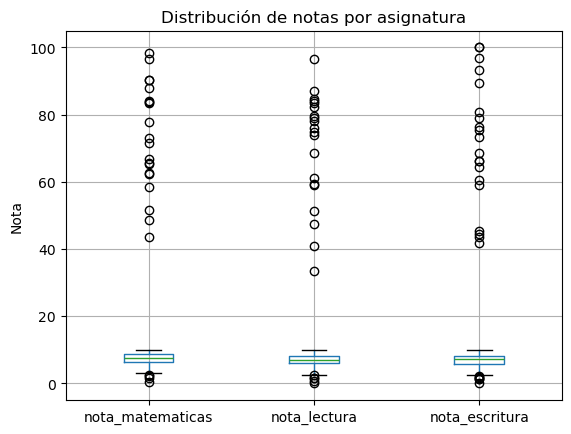

In [26]:
cols_notas = ["nota_matematicas", "nota_lectura", "nota_escritura"]

df[cols_notas].boxplot()
plt.title("Distribución de notas por asignatura")
plt.ylabel("Nota")
plt.show()


In [27]:
cols_notas = ["nota_matematicas", "nota_lectura", "nota_escritura"]

anomalies_mask = pd.DataFrame(False, index=df.index, columns=cols_notas)

for col in cols_notas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    anomalies_mask[col] = (
        (df[col] < Q1 - 3 * IQR) |
        (df[col] > Q3 + 3 * IQR)
    )

anomalies_mask.sum(axis=0)

nota_matematicas    20
nota_lectura        20
nota_escritura      20
dtype: int64

Tareas:
1. Crea `df_dropna`: **copia sin registros incompletos** (elimina filas con algún NaN).  
   - Sirve para ver cuánto dato perderías si eliminases todo lo incompleto.
2. Crea `df_clean` a partir de `df.copy()` y aplica:
   - **Corrección de outliers** en las 3 notas: si nota > 10, dividir entre 10.
   - **Rellenar NaN** en las 3 columnas de notas con la **media de su columna**.
   - (Opcional) Para categóricas, rellena NaN con la **moda**.
3. Recalcula **`Nota media`** a partir de las 3 columnas de notas ya limpias.
4. Crea `df_sin_nulos`: copia de `df_clean` sin registros con NaN (si has imputado todo, debería quedar igual o casi igual).

### Pistas (pandas)
- `df.dropna()`
- `df.copy()`
- `df.loc[condicion, col] = ...`
- `fillna`, `mode`

In [41]:
# TODO
df_dropna = df.dropna() # Copia df eliminando los registros que contienen algún valor faltante
df_clean = df.copy()  # Simplemente copia df. Luego limpiaremos esta versión

# corregir outliers (errores humanos) por columnas:Si nota > 10 --> nota = nota / 10
mask = df_clean[cols_notas].gt(10).any(axis=1)
df_clean.loc[mask, cols_notas] = df_clean.loc[mask, cols_notas].astype(float) / 10  # el any es: hay al menos algún True en esta fila? 
# imputar notas por columnas en los valores faltantes
df_clean[cols_notas] = df_clean[cols_notas].fillna(df_clean[cols_notas].median())

# recalcular nota media

df_clean["Nota media"] = df_clean[cols_notas].mean(axis=1)

# eliminar registros con algún NaN
df_sin_nulos = df_clean.dropna()
print("✅ Outliers:", (df_clean[cols_notas] <= 10).all().all())
print("✅ Sin NaN:", df_clean[cols_notas].isna().sum().sum() == 0)
print("✅ Nota media:", "Nota media" in df_clean.columns)

df_dropna.shape, df_clean[cols_notas + ["Nota media"]].head(), df_sin_nulos.shape

✅ Outliers: True
✅ Sin NaN: True
✅ Nota media: True


((855, 9),
    nota_matematicas  nota_lectura  nota_escritura  Nota media
 0              6.96          5.64            6.08    6.226667
 1              7.98          5.19            5.98    6.383333
 2              8.15          7.45            8.20    7.933333
 3              7.22          7.21            6.70    7.043333
 4              5.94          5.32            6.65    5.970000,
 (901, 9))

In [42]:
# @title Tests Bloque 4 (no modificar)
from test_eda import check_4
check_4(df, cols_notas, df_dropna, df_clean, df_sin_nulos)
print("✅ Bloque 4 correcto")

✅ Bloque 4 correcto


## 5️⃣ Conversión de variables categóricas a numéricas (encoding)

Para entrenar modelos de ML, las variables deben ser numéricas.

Tareas:
1. Convierte variables binarias `si/no` → `1/0`:
   - `come_en_centro`, `curso_preparacion`, `genero`
2. Codifica `nivel_educativo_padres` como ordinal: (Usa un diccionario)
   - primarios → 0
   - secundarios → 1
   - bachillerato → 2
   - universitarios → 3
3. Aplica **one-hot encoding** a `procedencia` (crea una columna por categoría).

Guarda el resultado en `df_encoded`.

### Pistas (pandas)
- `map(...)`
- `pd.get_dummies(..., columns=[...])`

In [56]:
# TODO
cols_categoricas = [
    c for c in df_clean.columns
    if (
        df_clean[c].dtype in ["object", "category"] or
        df_clean[c].nunique() < 10
    )
]
print(cols_categoricas)

df_encoded = df_clean.copy()  # Simplemente copia df_clean.

# Codifica las columnas categóricas en el nuevo dataframe
df_encoded[cols_categoricas[3]] = df_encoded[cols_categoricas[3]].map({
    'si':'1',
    'no':'0'
}).astype('float')
df_encoded[cols_categoricas[0]] = df_encoded[cols_categoricas[0]].map({
    'si':'1',
    'no':'0'
}).astype('float')
df_encoded[cols_categoricas[4]] = df_encoded[cols_categoricas[4]].map({
    'si':'1',
    'no':'0'
}).astype('float')
df_encoded[cols_categoricas[2]] = df_encoded[cols_categoricas[2]].map({
    'primarios':'0',
    'secundarios':'1',
    'bachillerato':'2',
    'universitario':'3'
}).astype('float')
df_encoded = pd.get_dummies(df_encoded, columns=[cols_categoricas[1]])


['genero', 'procedencia', 'nivel_educativo_padres', 'come_en_centro', 'curso_preparacion']


In [57]:
# @title Tests Bloque 5 (no modificar)
from test_eda import check_5
check_5(df_encoded)
print("✅ Bloque 5 correcto")

✅ Bloque 5 correcto


## 6️⃣ Normalización / estandarización

Muchos modelos (regresión, SVM, redes, etc.) funcionan mejor si las variables numéricas están en escalas comparables.

Partiendo del dataset con las columnas categoricas codificadas: `df_encoded`, vamos a **estandarizar** (z-score) las variables numéricas de notas:
$$
z = (x - \mu) / \sigma
$$
Usa **`ddof=0`** en la desviación típica para que la comprobación sea exacta.

Tareas:
1. Define `num_cols` con las columnas numéricas a estandarizar (incluye `Nota media`).
2. Crea `df_final` como copia de `df_encoded` y estandariza `num_cols`.

### Pistas
- `mu = df[num_cols].mean()`
- `sigma = df[num_cols].std(ddof=0)`

In [64]:
# TODO
num_cols = ["nota_matematicas", "nota_lectura", "nota_escritura", "Nota media"]

df_final = df_encoded.copy() # simplemente copia df_encoded
mu = df_final[num_cols].mean()
print('mu\n',mu)
sigma=df_final[num_cols].std(ddof=0)
print('sigma\n',sigma)
# Estandariza las colulmnas numéricas
df_final[num_cols] = (df_final[num_cols] - mu)/sigma
print(df_final)

mu
 nota_matematicas    7.240625
nota_lectura        6.712219
nota_escritura      6.757424
Nota media          6.903423
dtype: float64
sigma
 nota_matematicas    2.026985
nota_lectura        2.065330
nota_escritura      2.081793
Nota media          1.827418
dtype: float64
     genero  nivel_educativo_padres  come_en_centro  curso_preparacion  \
0       NaN                     NaN             NaN                0.0   
1       NaN                     NaN             NaN                1.0   
2       NaN                     NaN             NaN                0.0   
3       NaN                     NaN             NaN                1.0   
4       NaN                     NaN             NaN                0.0   
..      ...                     ...             ...                ...   
995     NaN                     NaN             NaN                1.0   
996     NaN                     NaN             NaN                1.0   
997     NaN                     NaN             NaN          

In [65]:
# @title Tests Bloque 6 (no modificar)
from test_eda import check_6
check_6(df_final, num_cols)
print("✅ Bloque 6 correcto")

✅ Bloque 6 correcto
